<p style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
 Import Modules necessary for running this notebook 
</p>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import os

import fun_CondProb as fn

<span style="font-size: 22px; color: green;"> :: FACTS 1.1.1 run</span> 
    

In [2]:
ssp='ssp245'
# path = f'/projects/kopp/ar2208/factsv1.1.1/coupling.{ssp}/output/'
path = os.path.expanduser(f'~/werk/2022_09_FACTS/0000_facts-OPdata/amarel/ar2208/factsv1.1.1/coupling.{ssp}/output/')
path = os.path.expanduser(f'~/werk.M2/0000_facts-OPdata.M2/amarel/ar2208/factsv1.1.1/coupling.{ssp}/output/')
files=fn.list_files_with_names(path, ["global"])
#
df = pd.DataFrame(files, columns=['File Name']).reset_index().rename(columns={'index': 'Index'})
# print(df.to_string(index=False))

### T0 Edit for final-sih.
- Check notability for the notes
- Plot the AIS and SD side by side for NYC-RSL
- Number of the violins should be similar for comparison, likely that the bin width needs to be increased
- Marking of the 83/17th percentiles on the violin
- Figure axis percentiles


<hr style="border: none; height: 2px; background-color: black; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
    Bayesian Paper Figure list
</span>
<br><br><br>

In [3]:
ssps = ['ssp119', 'ssp126','ssp245','ssp370', 'ssp585']
#
station=0; 
#
start_year=2020; end_year=2100; unit='cm'; 
#
# Base path of data folder (all ssp).
base_path = os.path.expanduser(f'~/werk.M2/0000_facts-OPdata.M2/amarel/ar2208/factsv1.1.1')
#
# Dictionary of filenames
file_names = {
    'GMSL_1f': 'total.workflow.wf1f.global.nc',                          'NYC-RSL_1f': 'total.workflow.wf1f.local.nc',
    'AIS_ar5_global': 'ar5AIS.ipccar5.icesheets_AIS_globalsl.nc',           'AIS_ar5_local': 'ar5AIS.ipccar5.icesheets_AIS_globalsl.nc', 

    'GMSL_2f': 'total.workflow.wf2f.global.nc',                          'NYC-RSL_2f': 'total.workflow.wf2f.local.nc',
    'AIS_larmip_global' : 'larmip.larmip.AIS_globalsl.nc',                  'AIS_larmip_local' : 'larmip.larmip.AIS_localsl.nc',

    'GMSL_3f': 'total.workflow.wf3f.global.nc',                          'NYC-RSL_3f': 'total.workflow.wf3f.local.nc',
    'AIS_d21_global' : 'deconto21.deconto21.AIS_AIS_globalsl.nc',           'AIS_d21_local' : 'deconto21.deconto21.AIS_AIS_localsl.nc',

    'GMSL_4': 'total.workflow.wf4.global.nc',                            'NYC-RSL_4': 'total.workflow.wf4.local.nc',
    'AIS_b19_global' : 'bamber19.bamber19.icesheets_AIS_globalsl.nc',       'AIS_b19_local' : 'bamber19.bamber19.icesheets_AIS_localsl.nc',
    
    
    'TE'  : 'ocean.tlm.sterodynamics_globalsl.nc',                          'SD'  : 'ocean.tlm.sterodynamics_localsl.nc', 
}
#
# Dictionary to store the results
all_ssp = {key: {} for key in file_names}

# Loop over each SSP scenario
for ssp in ssps:
    for key, filename in file_names.items():
        file_path = f'{base_path}/coupling.{ssp}/output/coupling.{ssp}.{filename}'
        dat, slc, time, lat, lon = fn.extract_nc_info(file_path, station, unit, start_year, end_year)
        all_ssp[key][ssp] = {'dat': dat, 'slc': slc, 'time': time, 'lat': lat, 'lon': lon, 'path': file_path, 'filename': filename}
del dat, slc, time, lat, lon, ssp, file_path, key, file_names, filename

In [4]:
# currently only 1 ssp allowed
plotOPT = {'ssps':'ssp245', 'y_ax_min':0, 'y_ax_max': 150, 'c_bar_min': 0.001, 'c_bar_max': 0.252,
        'plotCBAR':'YES', 'cmap':'Reds', 'scatter':'NO', 'plot_type':'violin', 'num_violins':10,
        'kernel' : 'gaussian', 'bw_kde':1, 'kde_grid_int' : 100, 'val':'density_values_Normalized'}

<hr style="border: none; height: 2px; background-color: red; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: red;">
    2050/2100 NYC total SL projections (LARMIP) conditional on
</span>
<ol style="font-family: 'Times New Roman'; font-size: 16pt; color: red;">
    <li>2030 GMSL observations TOTAL (LARMIP)</li>
    <li>2030 RSL observation TOTAL (LARMIP)</li>
    <li>2030 Thermal Expansion</li>
    <li>2030 Sterodynamic observations</li>
    <li>2030 AIS LARMIP</li>
</ol>

2050 'vs' 2030


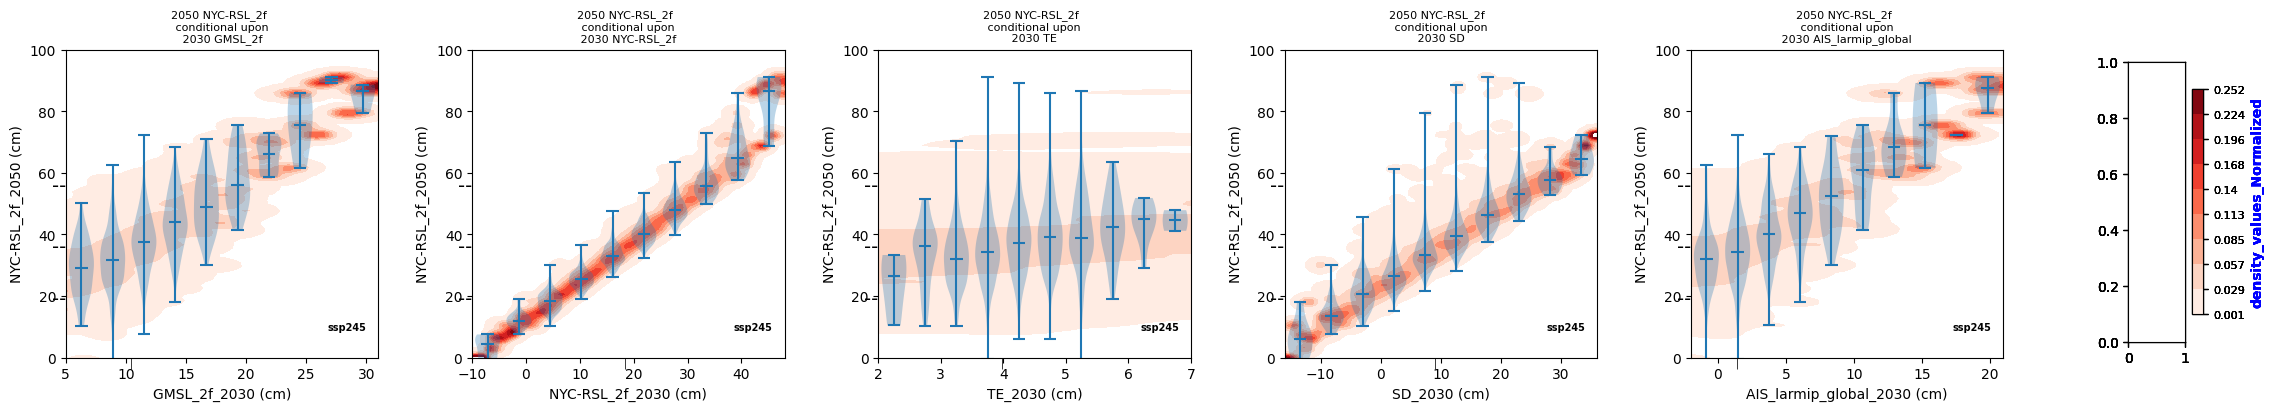

2100 'vs' 2030


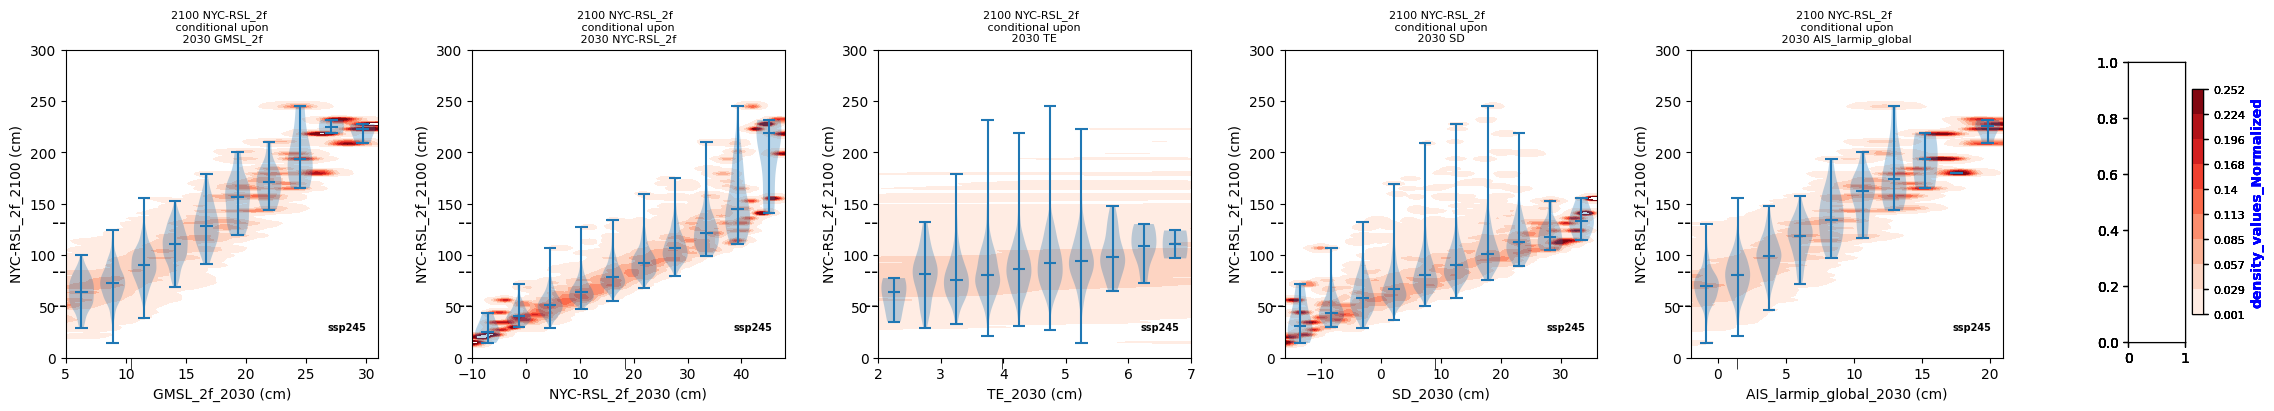

2100 'vs' 2050


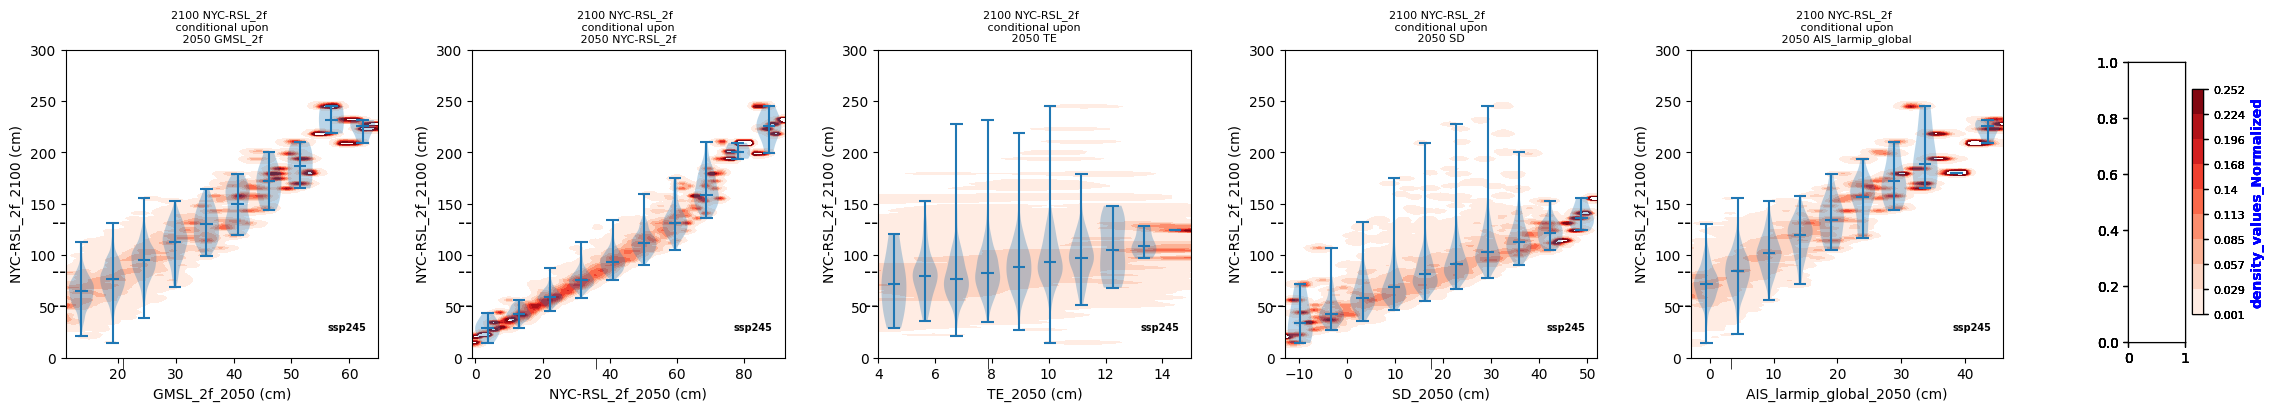

In [5]:
time_pairs = [(2030, 2050), (2030, 2100), (2050, 2100)]  # Example pairs
for T1, T2 in time_pairs:
    plot_params = {
        0: {'var1': all_ssp['GMSL_2f'], 't1': T1,       'var2': all_ssp['NYC-RSL_2f'], 't2': T2},
        1: {'var1': all_ssp['NYC-RSL_2f'], 't1': T1,    'var2': all_ssp['NYC-RSL_2f'], 't2': T2},
        2: {'var1': all_ssp['TE'], 't1': T1,            'var2': all_ssp['NYC-RSL_2f'], 't2': T2},
        3: {'var1': all_ssp['SD'], 't1': T1,            'var2': all_ssp['NYC-RSL_2f'], 't2': T2},
        4: {'var1': all_ssp['AIS_larmip_global'], 't1': T1,     'var2': all_ssp['NYC-RSL_2f'], 't2': T2},
    }
    plotOPT['y_ax_max']= 300 if T2 > 2050 else 100
    plotOPT['plotCBAR']='YES_1'; 
    print(f"{T2} 'vs' {T1}")
    fn.plot_ConditionalProb_panel(all_ssp,plot_params,plotOPT)

<hr style="border: none; height: 2px; background-color: blue; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    2050/2100 NYC projections conditional on GMSL contribution of AIS Component
</span>
<ol style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    <li>2030 AR5</li>
    <li>2030 larmip</li>
    <li>2030 d21</li>
    <li>2030 b19</li>
</ol>

2050 'vs' 2030


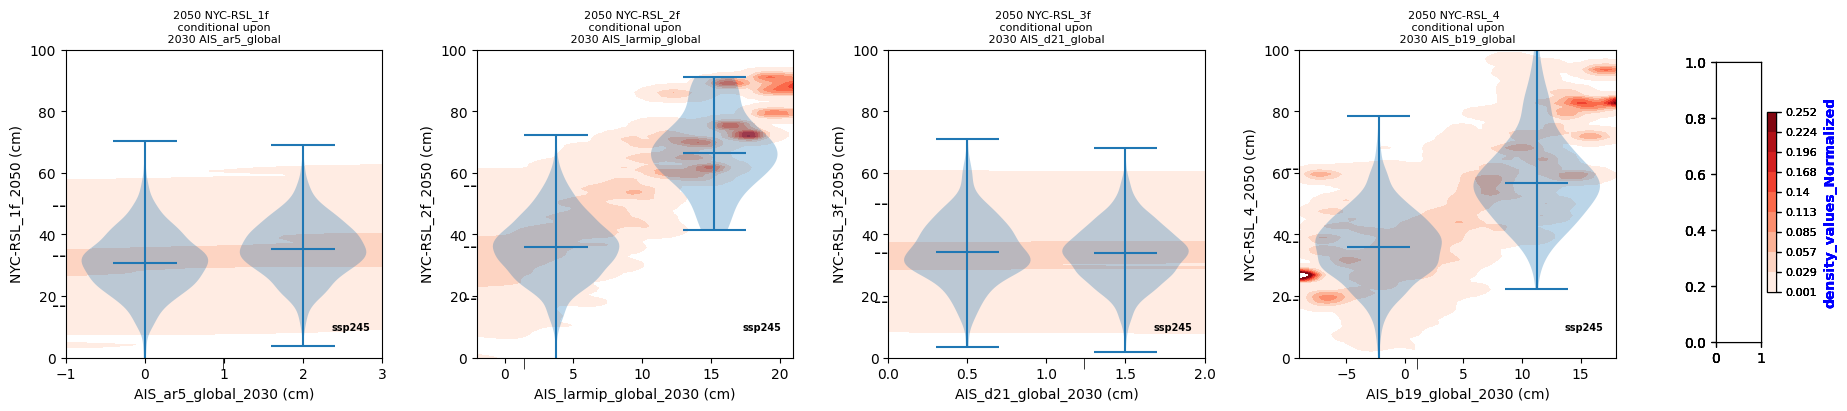

2100 'vs' 2030


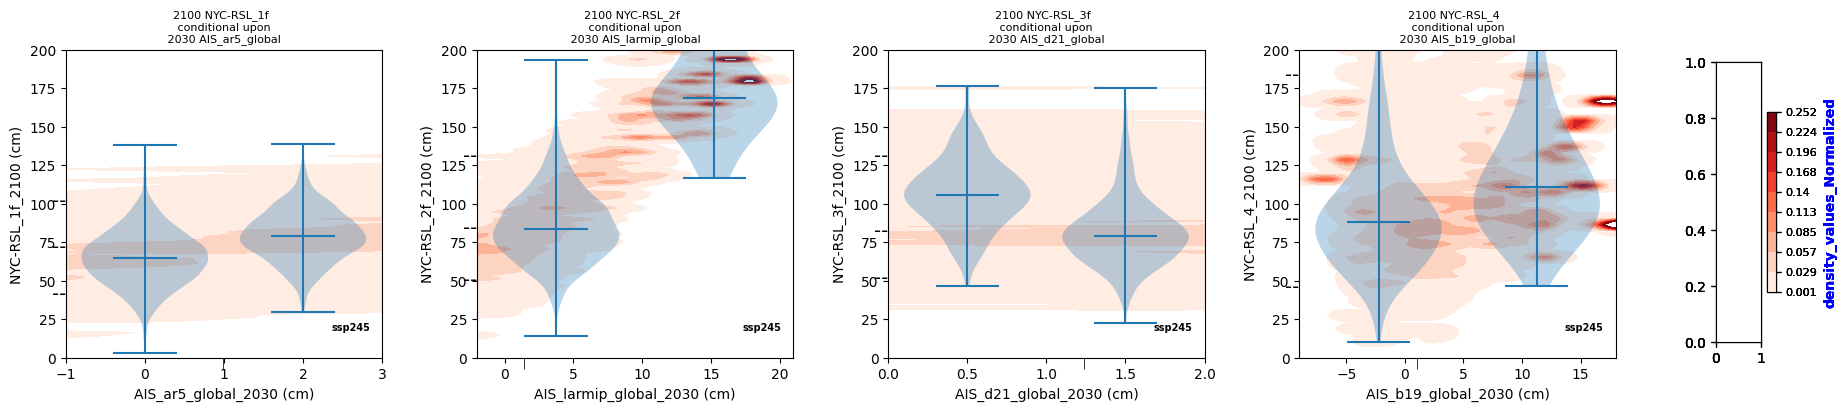

2100 'vs' 2050


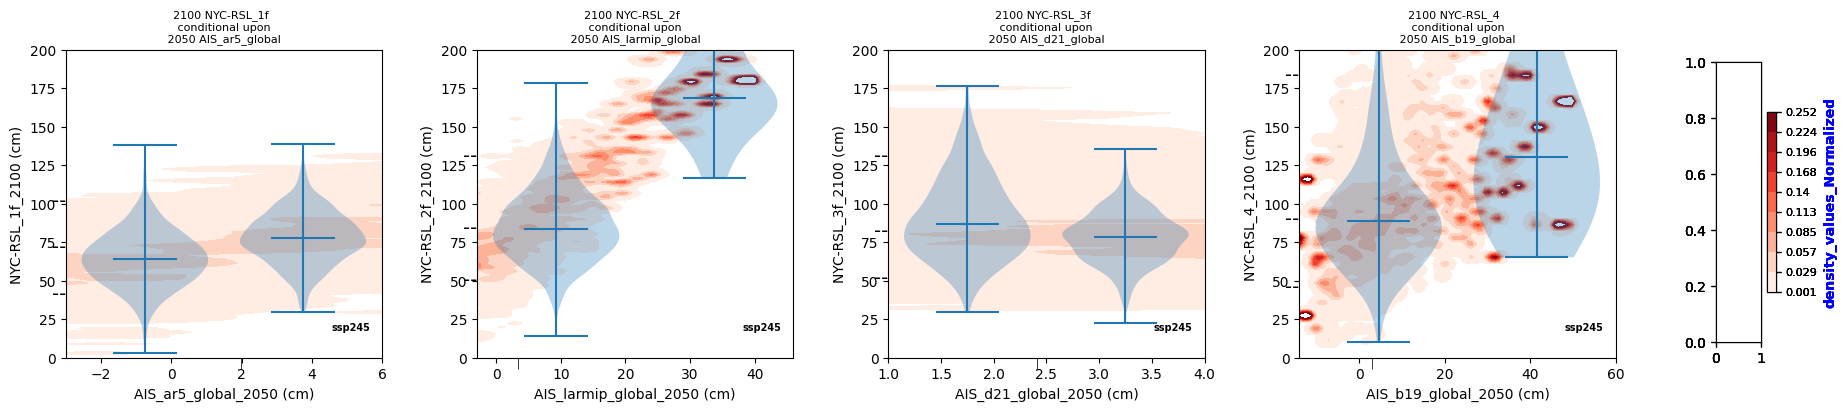

In [6]:
time_pairs = [(2030, 2050), (2030, 2100), (2050, 2100)]  # Example pairs
for T1, T2 in time_pairs:
    plot_params = {
        0: {'var1': all_ssp['AIS_ar5_global'], 't1': T1,        'var2': all_ssp['NYC-RSL_1f'], 't2': T2},
        1: {'var1': all_ssp['AIS_larmip_global'], 't1': T1,     'var2': all_ssp['NYC-RSL_2f'], 't2': T2},
        2: {'var1': all_ssp['AIS_d21_global'], 't1': T1,        'var2': all_ssp['NYC-RSL_3f'], 't2': T2},
        3: {'var1': all_ssp['AIS_b19_global'], 't1': T1,        'var2': all_ssp['NYC-RSL_4'], 't2': T2}
    }
    plotOPT.update({'num_violins': 2, 'plotCBAR': 'YES_1', 'y_ax_max' : 200 if T2 > 2050 else 100})
    print(f"{T2} 'vs' {T1}")
    fn.plot_ConditionalProb_panel(all_ssp,plot_params,plotOPT)

<hr style="border: none; height: 2px; background-color: black; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: black;">
    TOTAL GMSL (WF) projections conditional on AIS Component
</span>
<ol style="font-family: 'Times New Roman'; font-size: 16pt; color: black;">
    <li>2030 AIS ar5    <b>global</b> </li>
    <li>2030 AIS larmp  <b>global</b> </li>
    <li>2030 AIS d21    <b>global</b> </li>
    <li>2030 AIS b19    <b>global</b> </li>
</ol>

2050 'vs' 2030


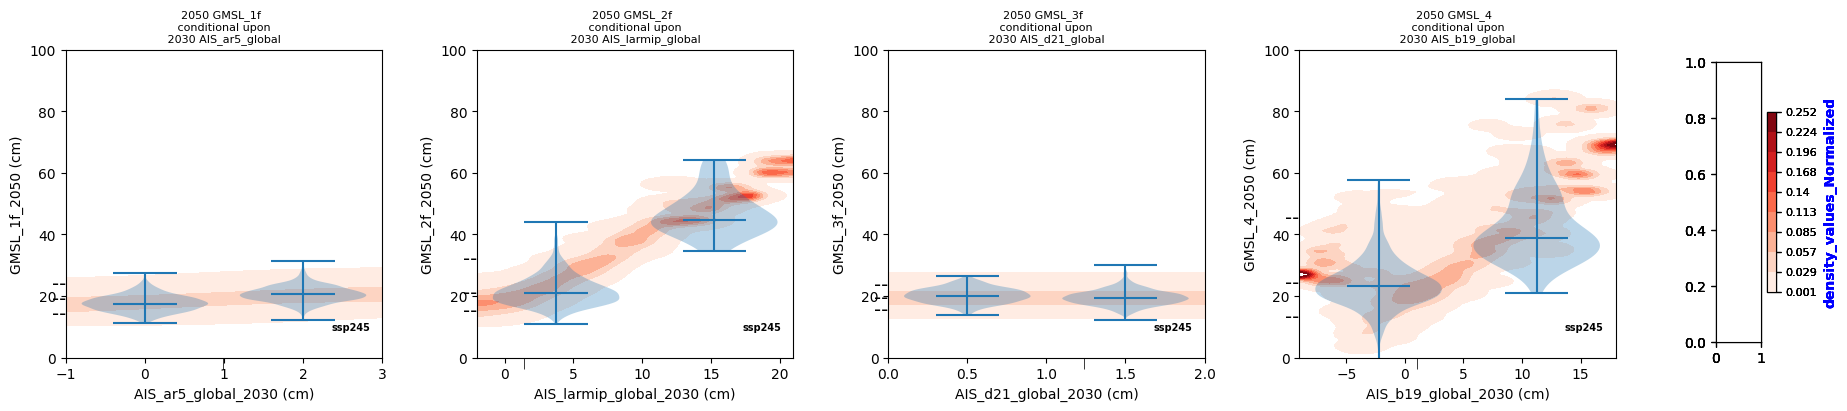

2100 'vs' 2030


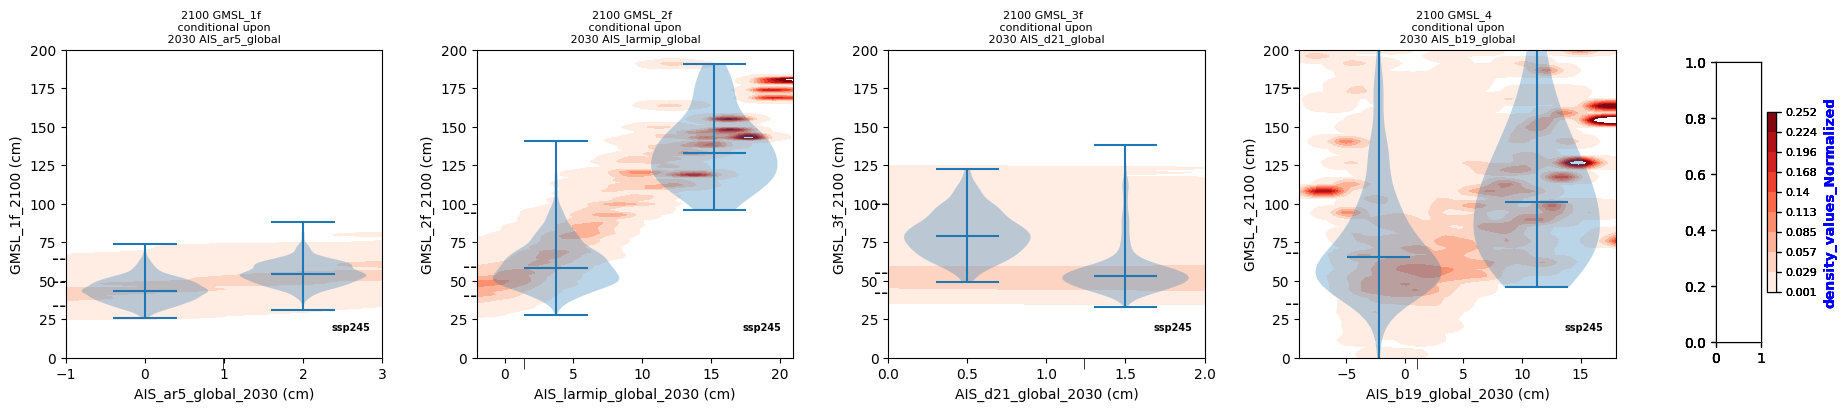

2100 'vs' 2050


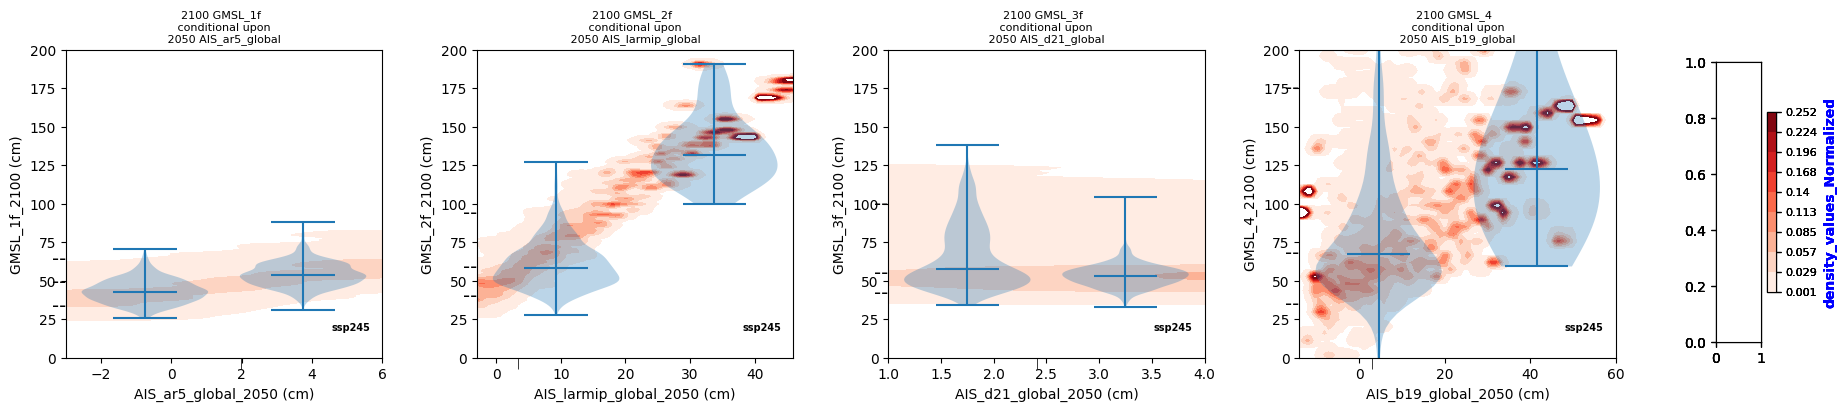

In [7]:
time_pairs = [(2030, 2050), (2030, 2100), (2050, 2100)]  # Example pairs
for T1, T2 in time_pairs:
    plot_params = {
        0: {'var1': all_ssp['AIS_ar5_global'], 't1': T1,           'var2': all_ssp['GMSL_1f'], 't2': T2},
        1: {'var1': all_ssp['AIS_larmip_global'], 't1': T1,        'var2': all_ssp['GMSL_2f'], 't2': T2},
        2: {'var1': all_ssp['AIS_d21_global'], 't1': T1,           'var2': all_ssp['GMSL_3f'], 't2': T2},
        3: {'var1': all_ssp['AIS_b19_global'], 't1': T1,           'var2': all_ssp['GMSL_4'], 't2': T2}
    }
    plotOPT.update({'num_violins': 2, 'plotCBAR': 'YES_1', 'y_ax_max' : 200 if T2 > 2050 else 100})
    print(f"{T2} 'vs' {T1}")
    fn.plot_ConditionalProb_panel(all_ssp,plot_params,plotOPT)

<hr style="border: none; height: 2px; background-color: black; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: black;">
    TOTAL NYC-WF-SL projections conditional on TOTAL GLOBAL 
</span>
<ol style="font-family: 'Times New Roman'; font-size: 16pt; color: black;">
    <li>2030 GMSL-WF (AR5)</li>
    <li>2030 GMSL-WF (larmip)</li>
    <li>2030 GMSL-WF (d21)</li>
    <li>2030 GMSL-WF (b19)</li>
</ol>

2050 'vs' 2030


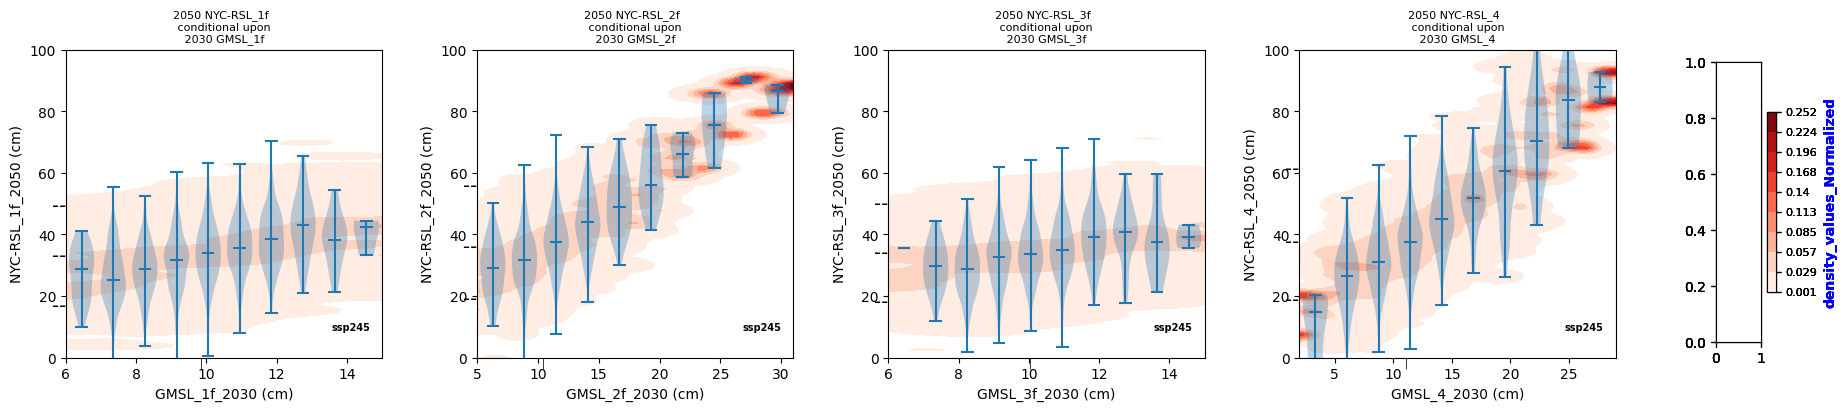

2100 'vs' 2030


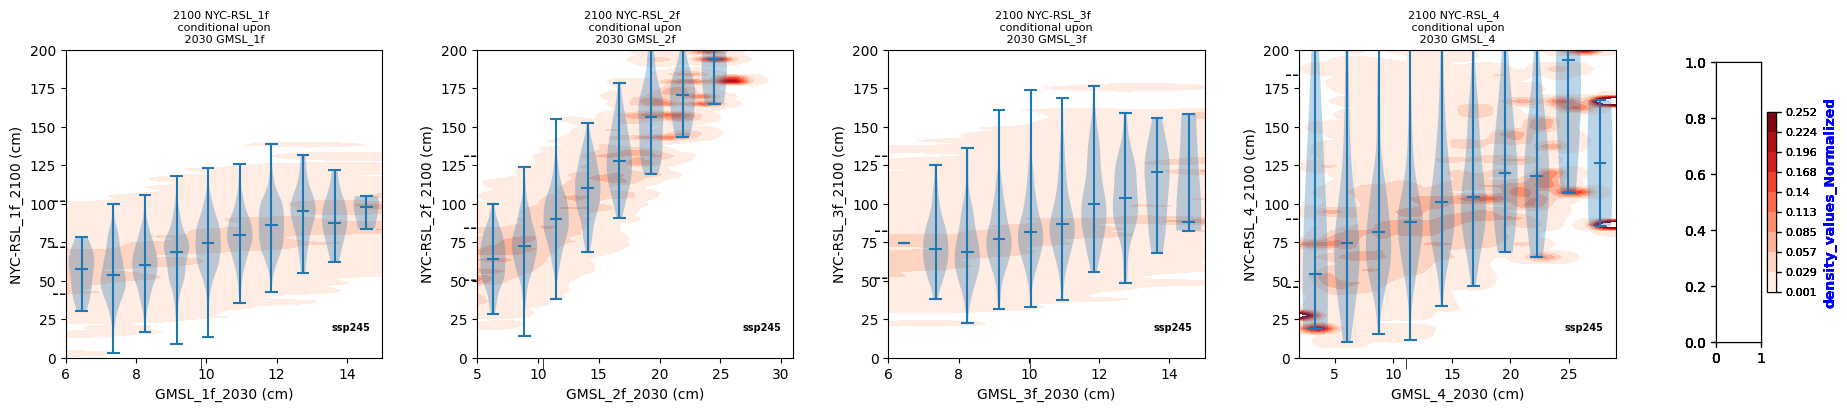

2100 'vs' 2050


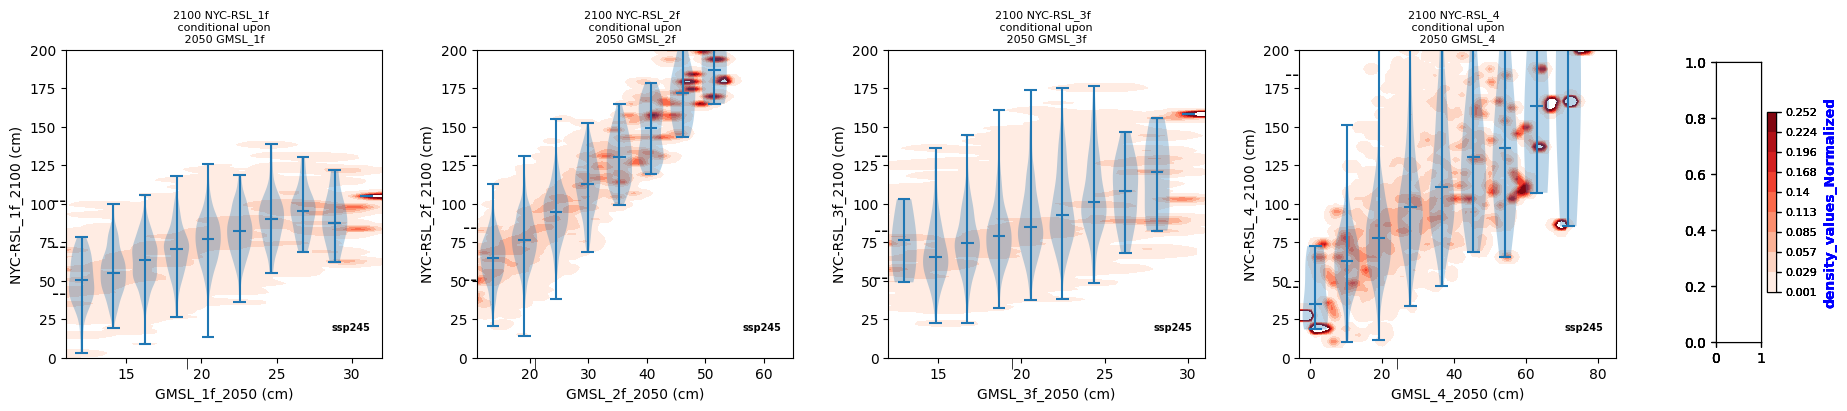

In [8]:
time_pairs = [(2030, 2050), (2030, 2100), (2050, 2100)]  # Example pairs
for T1, T2 in time_pairs:
    plot_params = {
        0: {'var1': all_ssp['GMSL_1f'], 't1': T1,       'var2': all_ssp['NYC-RSL_1f'], 't2': T2},
        1: {'var1': all_ssp['GMSL_2f'], 't1': T1,       'var2': all_ssp['NYC-RSL_2f'], 't2': T2},
        2: {'var1': all_ssp['GMSL_3f'], 't1': T1,       'var2': all_ssp['NYC-RSL_3f'], 't2': T2},
        3: {'var1': all_ssp['GMSL_4'], 't1': T1,        'var2': all_ssp['NYC-RSL_4'], 't2': T2}
    }
    plotOPT.update({'num_violins': 10, 'plotCBAR': 'YES_1', 'y_ax_max' : 200 if T2 > 2050 else 100})
    print(f"{T2} 'vs' {T1}")
    fn.plot_ConditionalProb_panel(all_ssp,plot_params,plotOPT)

<hr style="border: none; height: 2px; background-color: black; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    Fig:: Fraction of Variance
</span>